# 8과 [실습] 숫자 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 다이아몬드 데이터   
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [2]:
# 다이아몬드
diamond = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv')
diamond = diamond.sample(3000, random_state = 2022)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


→ 다이아몬드 정보
https://www2.stat.duke.edu/courses/Fall15/sta112.01/post/hw/HW1.html

In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.시각화

### 1) 산점도 : plt.scatter, sns.scatterplot, sns.jointplot

① iris의 Petal.Length와 Petal.Width의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

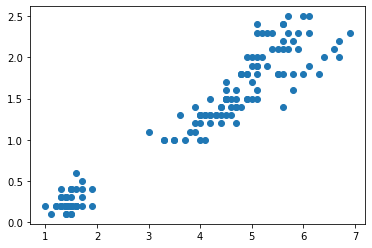

In [7]:
plt.scatter(iris['Petal.Length'], iris['Petal.Width'])
plt.show()

* sns.scatterplot

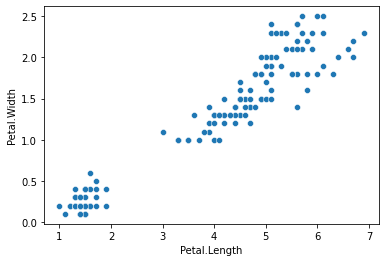

In [9]:
sns.scatterplot(x='Petal.Length', y='Petal.Width', data = iris)
plt.show()

* sns.scatterplot(    , hue = 'Species')

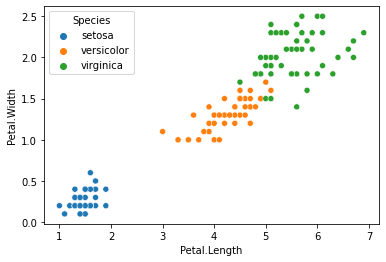

In [11]:
sns.scatterplot(x='Petal.Length', y='Petal.Width', data = iris, 
                hue = 'Species')
plt.show()

* sns.jointplot : scatter + histogram(혹은 density plot)  
- 숫자형 변수의 분표를 한꺼번에 비교하여 보여준다.

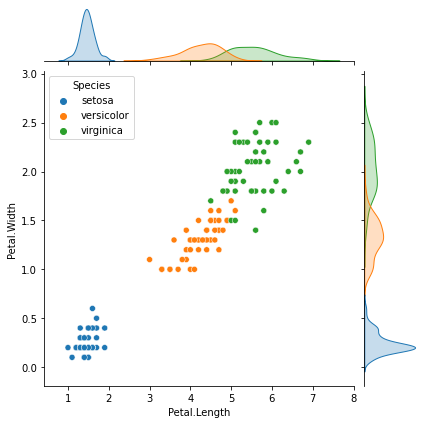

In [13]:
sns.jointplot(x='Petal.Length', y='Petal.Width', data = iris, 
              hue = 'Species')
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

Petal.Lengt 와 Petal.Width 는 강한 양의 상관관계가 있어 보인다.  
setosa는 Petal.Lengt 와 Petal.Width의 특정값으로 완벽하게 분류가 된다.

In [ ]:
Petal(꽃잎) 종류가 3가지 있고 + Petal(꽃잎) 길이와 넓이가 비례
setosa의 Petal(꽃잎) 길이 & 넓이가 가장 작음
virginica의 Petal(꽃잎) 길이 & 넓이가 가장 크다

② boston의 indus(비소매상업지구의 면적비율)와 medv(집값)의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

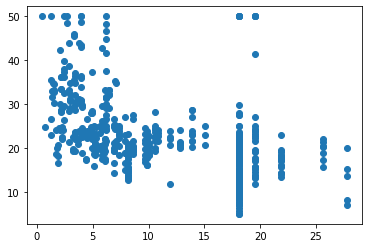

In [14]:
plt.scatter(boston['indus'], boston['medv'])
plt.show()

* sns.scatterplot

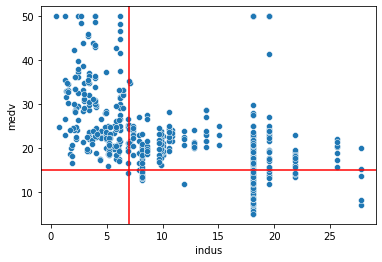

In [80]:
sns.scatterplot(x='indus', y='medv', data = boston)
plt.axhline(15, color = 'r')
plt.axvline(7, color = 'r')
plt.show()

* sns.jointplot : scatter + histogram(혹은 density plot)  
- 숫자형 변수의 분표를 한꺼번에 비교하여 보여준다.

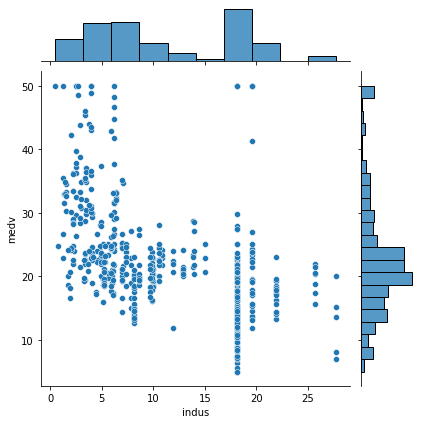

In [69]:
sns.jointplot(x='indus', y='medv', data = boston)
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

> 범주로 만들고 분석할 필요가 있어 보인다.

In [ ]:
medv(집값)은 48기준으로 밀도함수 2개가 그려진다 ← 이상치가 있는데 집값이 비싼이유가 무엇 때문일까? 부자동네? 유명인? 부동산법?
indus(비소매상업지구의 면적비율)은 17기준으로 밀도함수그래프가 2개 그려진다 ← 도로인가? 법적 기준이 있는가?

③ air의 Temp와 Ozone의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

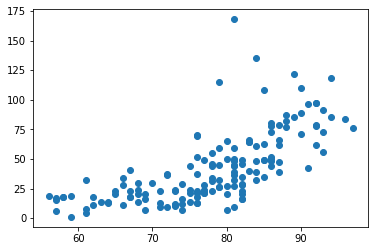

In [18]:
plt.scatter(air['Temp'], air['Ozone'])
plt.show()

* sns.scatterplot

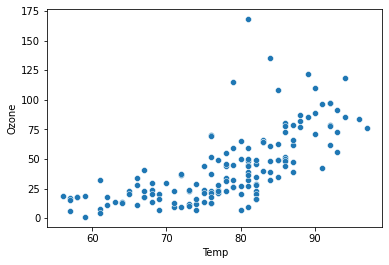

In [19]:
sns.scatterplot(x='Temp', y='Ozone', data = air)
plt.show()

* sns.jointplot : scatter + histogram(혹은 density plot)  
- 숫자형 변수의 분표를 한꺼번에 비교하여 보여준다.

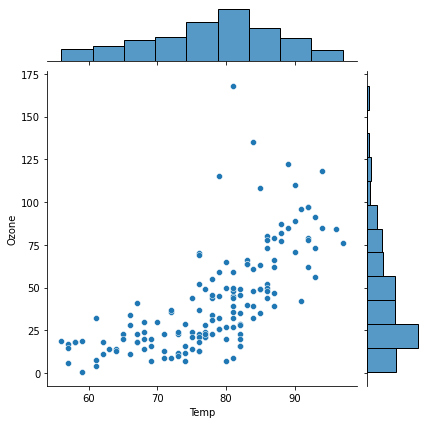

In [20]:
sns.jointplot(x='Temp', y='Ozone', data = air)
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

In [ ]:
귀무가설: 온도, 오존은 아무 관계가 없다.  
인과관계 : 온도가 올라가면 그 영향으로 오존 값도 상승한다.
상관관계 : 온도가 상승하는 것과 오존이 올라가는 것은 관계가 있다.

In [ ]:
산점도 그래프를 통해 → 온도가 높아질 수록 오존이 증가하는 양의 상관관계가 보인다.  
같은 온도라도 오존이 많이 높은 이상치가 보인다. 이유가 뭘까? 저날 미세먼지가 심했나? 황사? 공장에서 몰래 폐기물을 보냈나?

④ diamond의 carat과 price의 관계를 살펴보기 위해 산점도를 그려봅시다.
* plt.scatter

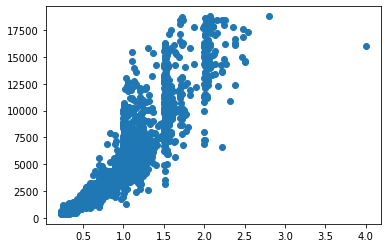

In [21]:
plt.scatter(diamond['carat'], diamond['price'])
plt.show()

* sns.scatterplot

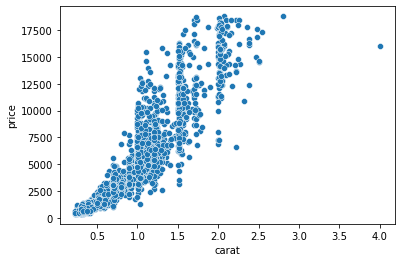

In [22]:
sns.scatterplot(x='carat', y='price', data = diamond)
plt.show()

* sns.jointplot : scatter + histogram(혹은 density plot)  
- 숫자형 변수의 분표를 한꺼번에 비교하여 보여준다.

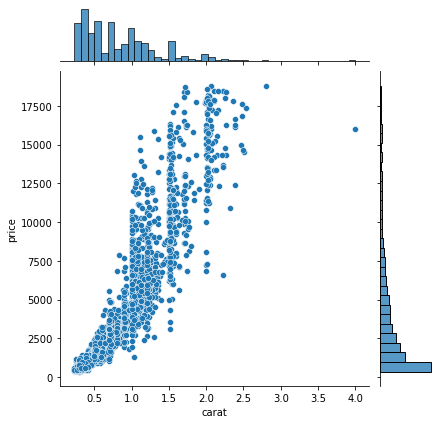

In [66]:
sns.jointplot(x='carat', y='price', data = diamond)
plt.show()

* 그래프로 부터 파악된 내용을 적어 봅시다.

1 carat = 0.2g

직선의 관계가 보인다.  
carat이 높을 수록 가격이 올라가는 양의 상관관계를 보인다.    
~2.25 carat이 대부분이고 가끔 고급 carat이 나오는게 이상치로 추측된다.  

### 2) 한꺼번에 산점도 그리기 : sns.pairplot

In [34]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Ozone    153 non-null    int64         
 1   Solar.R  146 non-null    float64       
 2   Wind     153 non-null    float64       
 3   Temp     153 non-null    int64         
 4   Date     153 non-null    datetime64[ns]
 5   Month    153 non-null    int64         
 6   Weekday  153 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 8.5 KB


① air 데이터프레임에서 Month와 Day를 제외하고 산점도를 한꺼번에 그려봅시다.

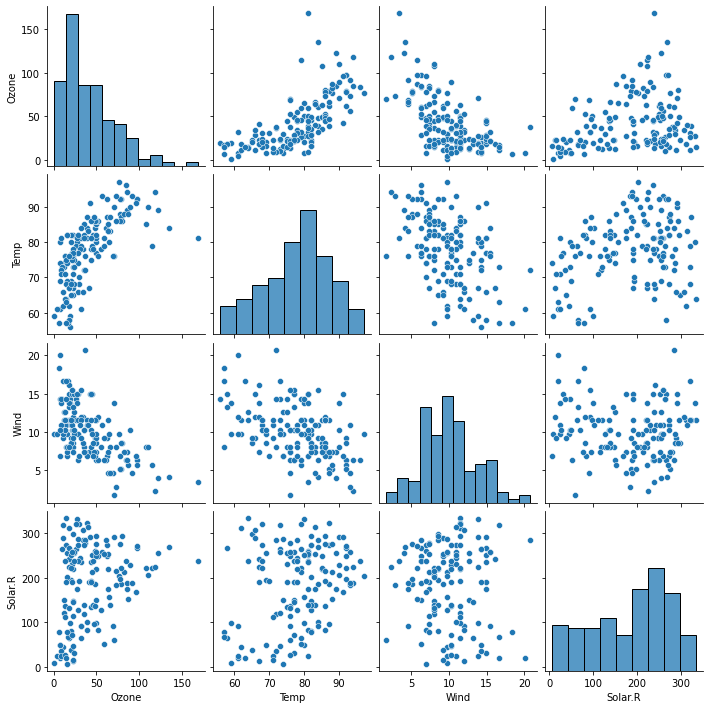

In [46]:
# 1) vars=['컬럼명', '컬럼명', ...,]

sns.pairplot(data = air, vars=['Ozone', 'Temp', 'Wind', 'Solar.R'])
plt.show()

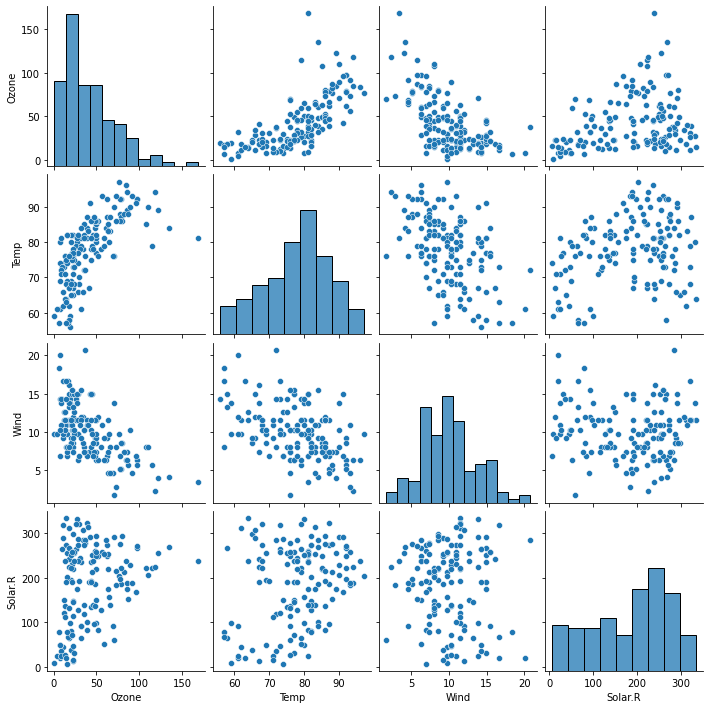

In [56]:
# 2) .loc
air2 = air.loc[ : , ['Ozone', 'Temp', 'Wind', 'Solar.R'] ]
sns.pairplot(data = air2)
plt.show()

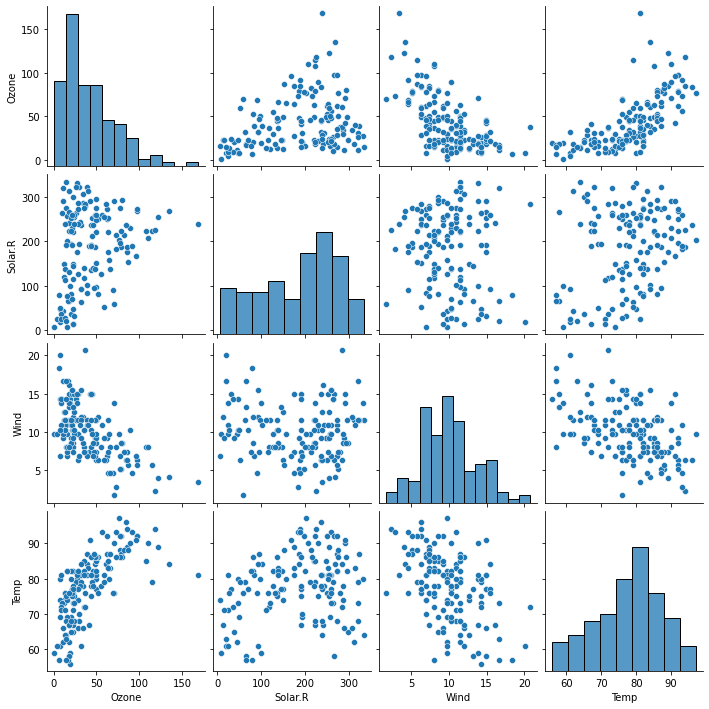

In [57]:
# 3) .drop
# 지운거처럼 보여줭
air3 = air.drop(['Date', 'Month', 'Weekday'], axis = 1, inplace = False)
sns.pairplot(data = air3)
plt.show()

# 진짜 지우려면 inplace = True
# air.drop(['Date', 'Month', 'Weekday'], axis = 1, inplace = True)

② iris 데이터프레임에 대해서, Species를 제외하고 한꺼번에 산점도를 그려봅시다.

In [48]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

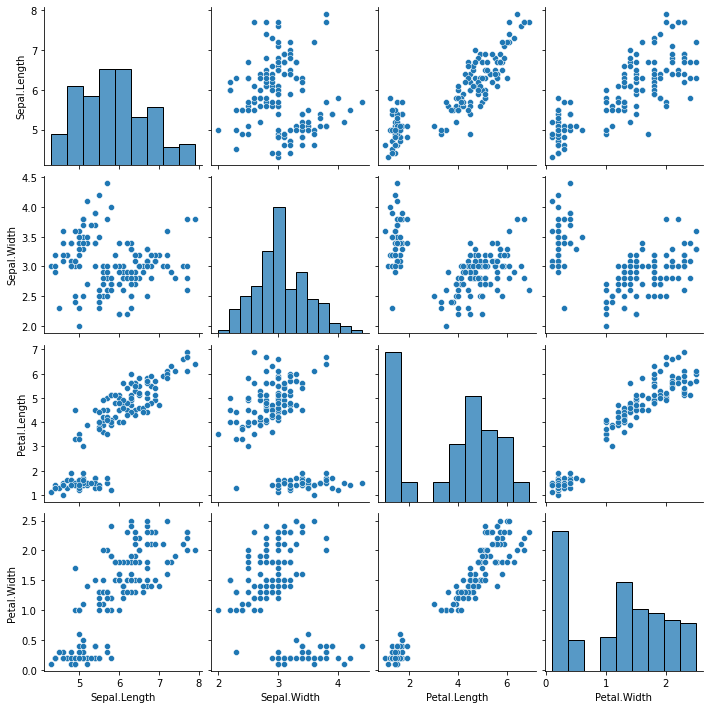

In [49]:
sns.pairplot(data = iris, vars=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])
plt.show()

## 3.수치화 : 상관분석

In [42]:
import scipy.stats as spst

① boston.indus와 boston.medv의 관계를 수치화 해 봅시다.  

결과를 해석해 봅시다.

indus : 비소매상업지역 면적 비율       
medv : 타운별 집값(중위수)

In [50]:
# 상관계수와 p-value ← x, y 위치 바뀌어도 결과는 동일하다

spst.pearsonr(boston['indus'], boston['medv'])

(-0.4837251600283729, 4.900259981751351e-31)

e-31 : 10의 마이너스 31승

p-value : 대립가설이 맞다라고 할 때 틀릴 확률

② diamond의 각 변수들 간에 상관 계수를 구해 봅시다.

In [64]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
diamond.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027081,0.160081,0.918257,0.978485,0.976614,0.962422
depth,0.027081,1.000000,-0.305373,-0.016220,-0.027121,-0.030945,0.091622
table,0.160081,-0.305373,1.000000,0.097818,0.172048,0.166498,0.130414
price,0.918257,-0.016220,0.097818,1.000000,0.884365,0.886169,0.866249
x,0.978485,-0.027121,0.172048,0.884365,1.000000,0.997668,0.980012
y,0.976614,-0.030945,0.166498,0.886169,0.997668,1.000000,0.980099
z,0.962422,0.091622,0.130414,0.866249,0.980012,0.980099,1.000000


In [62]:
# 데이터프레임으로 부터 수치형 데이터에 대한 상관계수 구하기
temp = diamond.corr()
print(type(temp))
print(temp)

<class 'pandas.core.frame.DataFrame'>
          carat     depth     table     price         x         y         z
carat  1.000000  0.027081  0.160081  0.918257  0.978485  0.976614  0.962422
depth  0.027081  1.000000 -0.305373 -0.016220 -0.027121 -0.030945  0.091622
table  0.160081 -0.305373  1.000000  0.097818  0.172048  0.166498  0.130414
price  0.918257 -0.016220  0.097818  1.000000  0.884365  0.886169  0.866249
x      0.978485 -0.027121  0.172048  0.884365  1.000000  0.997668  0.980012
y      0.976614 -0.030945  0.166498  0.886169  0.997668  1.000000  0.980099
z      0.962422  0.091622  0.130414  0.866249  0.980012  0.980099  1.000000


In [63]:
temp = diamond.corr()
temp.loc[temp['carat'] > 0.5]

,carat,depth,table,price,x,y,z
carat,1.000000,0.027081,0.160081,0.918257,0.978485,0.976614,0.962422
price,0.918257,-0.016220,0.097818,1.000000,0.884365,0.886169,0.866249
x,0.978485,-0.027121,0.172048,0.884365,1.000000,0.997668,0.980012
y,0.976614,-0.030945,0.166498,0.886169,0.997668,1.000000,0.980099
z,0.962422,0.091622,0.130414,0.866249,0.980012,0.980099,1.000000


위 결과로 부터,
1. 같은 변수끼리 구한 값 1은 의미 없다.
2. 상관계수의 절대값이 
    * 1에 가까울 수록 강한 상관관계
    * 0에 가까울 수록 약한 상관관계
3. +는 양의 상관관계, -는 음의 상관관계 

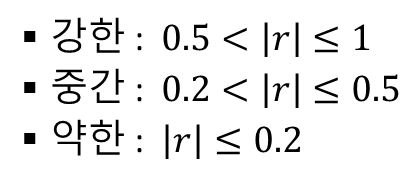

③ 위 결과에서 가장 강한 상관관계와 약한 상관관계를 찾아 봅시다.

In [ ]:
가장 강한 상관관계 : carat 과 x
가장 약한 상관관계 : carat 과 depth